## Market Research for Restaurant in New York City
#### July 30, 2020. Nayeong Lee.

### 1. Load Data

Import necessary libraries

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#module to convert an address into latitude and longitude values
# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# plotting library
# !conda install -c conda-forge folium=0.5.0 --yes
import folium 

print('Done!')

Done!


Define Foursquare credentials and version

In [3]:
CLIENT_ID = 'R0CPEEFH5XVGQ1ZXZBOIBE13XH11JKOXSTGWA1GLNTYXXYFZ' 
CLIENT_SECRET = 'IS5DGYQ2L2XPY1OQRGGXOOYZG45MCHZ0HUKBVFBUTMH2PT0R'
VERSION = '20180604'
LIMIT = 30
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: R0CPEEFH5XVGQ1ZXZBOIBE13XH11JKOXSTGWA1GLNTYXXYFZ
CLIENT_SECRET:IS5DGYQ2L2XPY1OQRGGXOOYZG45MCHZ0HUKBVFBUTMH2PT0R


Convert the client's address

In [4]:
address = '447 Broadway, New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

radius = 3000
LIMIT = 300

print('latitude :', latitude, 'longitude :', longitude)
print('Search for restaurants within {} meters from the location.'.format(radius))

latitude : 40.72044 longitude : -74.0011797
Search for restaurants within 3000 meters from the location.


Define URL

In [5]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=R0CPEEFH5XVGQ1ZXZBOIBE13XH11JKOXSTGWA1GLNTYXXYFZ&client_secret=IS5DGYQ2L2XPY1OQRGGXOOYZG45MCHZ0HUKBVFBUTMH2PT0R&ll=40.72044,-74.0011797&v=20180604&radius=3000&limit=300'

Send GET request and examine results

In [6]:
import requests
results = requests.get(url).json()
'There are {} spots around the client\'s location.'.format(len(results['response']['groups'][0]['items']))

"There are 100 spots around the client's location."

Get relevant part of JSON

In [7]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

items = results['response']['groups'][0]['items']
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Le Coucou,French Restaurant,138 Lafayette St,40.719114,-74.000202,"[{'label': 'display', 'lat': 40.71911370398213...",169,10013,US,New York,NY,United States,"[138 Lafayette St, New York, NY 10013, United ...",NaN,NaN,57583641498e90001a32e13e
1,Hair Toto Group,Salon / Barbershop,193 Centre St,40.718629,-73.999593,"[{'label': 'display', 'lat': 40.71862896859177...",242,10013,US,New York,NY,United States,"[193 Centre St (Canal & Centre St), New York, ...",Canal & Centre St,NaN,4b96c70ff964a520dfe334e3
2,MUJI 無印良品 (MUJI),Miscellaneous Shop,455 Broadway,40.720709,-74.001015,"[{'label': 'display', 'lat': 40.72070927138853...",33,10013,US,New York,NY,United States,"[455 Broadway (btwn Grand & Howard St), New Yo...",btwn Grand & Howard St,NaN,4a4115a8f964a520c0a41fe3
3,Aire Ancient Baths,Spa,88 Franklin St,40.718141,-74.004941,"[{'label': 'display', 'lat': 40.71814141164123...",407,10013,US,New York,NY,United States,"[88 Franklin St (at Church St), New York, NY 1...",at Church St,NaN,4fbbd9ede4b0756c0d4c2364
4,19 Cleveland,Mediterranean Restaurant,19 Cleveland Pl,40.721608,-73.997249,"[{'label': 'display', 'lat': 40.72160778167724...",356,10012,US,New York,NY,United States,"[19 Cleveland Pl (at Kenmare St), New York, NY...",at Kenmare St,NaN,5b9ef2d9f8cbd4002c8c7c1e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Upstate Craft Beer and Oyster Bar,Seafood Restaurant,95 1st Ave,40.726331,-73.986453,"[{'label': 'display', 'lat': 40.726331, 'lng':...",1404,10003,US,New York,NY,United States,"[95 1st Ave (at 6th St), New York, NY 10003, U...",at 6th St,NaN,4e41f0822271a90466a0e967
96,Ice & Vice,Ice Cream Shop,221 E Broadway,40.714375,-73.986956,"[{'label': 'display', 'lat': 40.71437495855316...",1376,10002,US,New York,NY,United States,"[221 E Broadway (at Clinton St), New York, NY ...",at Clinton St,NaN,55665f1c498e01976141b08b
97,Van Leeuwen Ice Cream,Ice Cream Shop,48 1/2 E 7th St,40.727692,-73.987691,"[{'label': 'display', 'lat': 40.727692, 'lng':...",1395,10003,US,New York,NY,United States,"[48 1/2 E 7th St (at 2nd Ave), New York, NY 10...",at 2nd Ave,NaN,4dd2d0207d8ba0f1bdec829d
98,Via Carota,Italian Restaurant,51 Grove St,40.733052,-74.003573,"[{'label': 'display', 'lat': 40.73305214118735...",1418,10014,US,New York,NY,United States,"[51 Grove St, New York, NY 10014, United States]",NaN,NaN,543c7c63498e0a3393da47a2


View all catagories of spots

In [8]:
grouped = dataframe_filtered.groupby(dataframe_filtered['categories']).size()
pd.set_option('display.max_rows', 70)
grouped

categories
Asian Restaurant                 1
Australian Restaurant            1
Bagel Shop                       1
Bakery                           1
Bar                              1
Beer Store                       1
Bookstore                        2
Building                         1
Café                             1
Cheese Shop                      2
Chocolate Shop                   1
Clothing Store                   1
Club House                       1
Coffee Shop                      4
Comedy Club                      1
Cycle Studio                     1
Dog Run                          1
Electronics Store                1
Falafel Restaurant               1
French Restaurant                2
Furniture / Home Store           1
Garden                           2
Gourmet Shop                     1
Greek Restaurant                 1
Grocery Store                    1
Gym                              1
Gym / Fitness Center             2
Hotel                            3
Ice Cream

Select only restaurants in the data

In [9]:
rts_df = dataframe_filtered[dataframe_filtered['categories'].str.contains("Restaurant|Pizza|Salad|Sandwich|Taco")]
rts_df.reset_index(drop=True, inplace=True)
rts_df

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Le Coucou,French Restaurant,138 Lafayette St,40.719114,-74.000202,"[{'label': 'display', 'lat': 40.71911370398213...",169,10013,US,New York,NY,United States,"[138 Lafayette St, New York, NY 10013, United ...",NaN,NaN,57583641498e90001a32e13e
1,19 Cleveland,Mediterranean Restaurant,19 Cleveland Pl,40.721608,-73.997249,"[{'label': 'display', 'lat': 40.72160778167724...",356,10012,US,New York,NY,United States,"[19 Cleveland Pl (at Kenmare St), New York, NY...",at Kenmare St,NaN,5b9ef2d9f8cbd4002c8c7c1e
2,sweetgreen,Salad Place,100 Kenmare St,40.721184,-73.997111,"[{'label': 'display', 'lat': 40.7211844, 'lng'...",353,10012,US,New York,NY,United States,[100 Kenmare St (btwn Cleveland & Mulberry St)...,btwn Cleveland & Mulberry St,NaN,5484890c498e985cf4e3c076
3,CAVA,Mediterranean Restaurant,50 Spring St,40.721928,-73.996512,"[{'label': 'display', 'lat': 40.72192791798716...",427,10012,US,New York,NY,United States,"[50 Spring St, New York, NY 10012, United States]",NaN,NaN,59e0ee84f0ca95526b7fce9f
4,Taïm Falafel and Smoothie Bar,Falafel Restaurant,45 Spring St,40.721936,-73.996279,"[{'label': 'display', 'lat': 40.72193609041910...",445,10012,US,New York,NY,United States,"[45 Spring St (at Mulberry St), New York, NY 1...",at Mulberry St,"NoLita, New York, NY",4f3046da7beb0cfa14dcac59
5,Ruby's Café,Australian Restaurant,219 Mulberry St,40.722292,-73.996248,"[{'label': 'display', 'lat': 40.722292, 'lng':...",464,10012,US,New York,NY,United States,"[219 Mulberry St (btwn Prince & Spring St), Ne...",btwn Prince & Spring St,NaN,40c10d00f964a520dd001fe3
6,Rubirosa Ristorante,Italian Restaurant,235 Mulberry St,40.722706,-73.995957,"[{'label': 'display', 'lat': 40.72270625453151...",507,10012,US,New York,NY,United States,"[235 Mulberry St (btwn Prince & Spring St), Ne...",btwn Prince & Spring St,NaN,4cc6222106c25481d7a4a047
7,San Carlo Osteria Piemonte,Italian Restaurant,90 Thompson St,40.725223,-74.002594,"[{'label': 'display', 'lat': 40.72522295345200...",545,10012,US,New York,NY,United States,"[90 Thompson St (Spring St), New York, NY 1001...",Spring St,NaN,56d92e05498e6c54b6325b19
8,SUGARFISH by sushi nozawa,Sushi Restaurant,202 Spring St,40.725300,-74.003507,"[{'label': 'display', 'lat': 40.72529979609135...",575,10012,US,New York,NY,United States,"[202 Spring St (at Sullivan St), New York, NY ...",at Sullivan St,NaN,5c6c6715f709c1002cd49290
9,Prince Street Pizza,Pizza Place,27 Prince St,40.723093,-73.994527,"[{'label': 'display', 'lat': 40.72309326145674...",634,10012,US,New York,NY,United States,"[27 Prince St (btwn Mott & Elizabeth St), New ...",btwn Mott & Elizabeth St,NaN,4f045eeb00399761c77301e3


Visualize items on the map

In [10]:
# generate map centred around the client's location
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15)

# add the client's location as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=7,
    popup='Client',
    fill=True,
    color='blue',
    fill_color='blue',
    fill_opacity=0.8
    ).add_to(venues_map)

# add all spots to the map as blue circle markers
for lat, lng, label in zip(rts_df.lat, rts_df.lng, rts_df.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.5
        ).add_to(venues_map)

# display map
venues_map

### 2. Which kind of restaurants are the most distributed?

Sort the data by categories

In [10]:
rts_sorted = rts_df.sort_values(by='categories', ascending=True)
rts_sorted.reset_index(drop=True, inplace=True)
rts_sorted

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Ramen Ishida,Asian Restaurant,122 Ludlow Street,40.719635,-73.988366,"[{'label': 'display', 'lat': 40.719635, 'lng':...",1084,10002,US,New York,NY,United States,"[122 Ludlow Street, New York, NY 10002, United...",NaN,NaN,591b9e948496ca6e22cdd3f6
1,Ruby's Café,Australian Restaurant,219 Mulberry St,40.722292,-73.996248,"[{'label': 'display', 'lat': 40.722292, 'lng':...",464,10012,US,New York,NY,United States,"[219 Mulberry St (btwn Prince & Spring St), Ne...",btwn Prince & Spring St,NaN,40c10d00f964a520dd001fe3
2,Taïm Falafel and Smoothie Bar,Falafel Restaurant,45 Spring St,40.721936,-73.996279,"[{'label': 'display', 'lat': 40.72193609041910...",445,10012,US,New York,NY,United States,"[45 Spring St (at Mulberry St), New York, NY 1...",at Mulberry St,"NoLita, New York, NY",4f3046da7beb0cfa14dcac59
3,Le Coucou,French Restaurant,138 Lafayette St,40.719114,-74.000202,"[{'label': 'display', 'lat': 40.71911370398213...",169,10013,US,New York,NY,United States,"[138 Lafayette St, New York, NY 10013, United ...",NaN,NaN,57583641498e90001a32e13e
4,Buvette,French Restaurant,42 Grove St,40.732782,-74.004275,"[{'label': 'display', 'lat': 40.73278220203262...",1398,10014,US,New York,NY,United States,"[42 Grove St (btwn Bedford & Bleecker St), New...",btwn Bedford & Bleecker St,West Village,4d0bf7e3f29c236ac675bfe7
5,Kiki's,Greek Restaurant,130 Division St,40.714476,-73.992036,"[{'label': 'display', 'lat': 40.71447608287686...",1017,10002,US,New York,NY,United States,"[130 Division St (btwn Orchard & Ludlow St), N...",btwn Orchard & Ludlow St,Chinatown,5521c2ff498ebe2368634187
6,Tamarind TriBeCa,Indian Restaurant,99 Hudson St,40.719211,-74.008727,"[{'label': 'display', 'lat': 40.71921117375622...",651,10013,US,New York,NY,United States,"[99 Hudson St (at Franklin St), New York, NY 1...",at Franklin St,NaN,4bbb9dbded7776b0e1ad3e51
7,Dante NYC,Italian Restaurant,79-81 Macdougal St,40.728847,-74.001622,"[{'label': 'display', 'lat': 40.72884702136024...",936,10012,US,New York,NY,United States,[79-81 Macdougal St (btwn W Houston & Bleecker...,btwn W Houston & Bleecker St,NaN,556f4ef2498ee60139b28c72
8,Carbone,Italian Restaurant,181 Thompson St,40.727903,-74.000136,"[{'label': 'display', 'lat': 40.72790327156426...",835,10012,US,New York,NY,United States,[181 Thompson St (btwn Bleecker & W Houston St...,btwn Bleecker & W Houston St,NaN,504b2a9ee4b006c435a465d3
9,Via Carota,Italian Restaurant,51 Grove St,40.733052,-74.003573,"[{'label': 'display', 'lat': 40.73305214118735...",1418,10014,US,New York,NY,United States,"[51 Grove St, New York, NY 10014, United States]",NaN,NaN,543c7c63498e0a3393da47a2


Count the number of values in each categories

In [11]:
rts_cnt = rts_df.groupby(rts_df['categories'])
rts_cnt_df = pd.DataFrame(rts_cnt.size())
rts_cnt_df.columns = ['count']
rts_cnt_df = rts_cnt_df.sort_values(by='count', ascending=False)
print('The most distributed kind of restaurant is \'', rts_cnt_df.index[0], '\'.', sep='')
rts_cnt_df

The most distributed kind of restaurant is 'Italian Restaurant'.


,count
categories,
Italian Restaurant,5
Pizza Place,4
Seafood Restaurant,3
Sandwich Place,3
Vegetarian / Vegan Restaurant,2
French Restaurant,2
Thai Restaurant,2
Mediterranean Restaurant,2
New American Restaurant,2


Plot the distribution

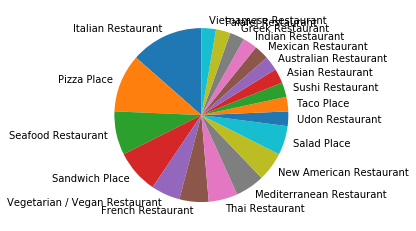

In [16]:
import matplotlib.pyplot as plt
plt.pie(list(rts_cnt_df['count']), labels=list(rts_cnt_df.index), startangle=90)
plt.show()

### 3. Search restaurants with good ratings (9/10 or higher)

In [13]:
ratings = {}
for name, cat, ve_id in zip(rts_sorted.name, rts_sorted.categories, rts_sorted.id):
    venue_id = ve_id
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        ratings[name] = [cat, result['response']['venue']['rating']]
    except:
        ratings[name] = [cat, 'not be rated yet']
        
ratings_df = pd.DataFrame(ratings).transpose()
ratings_df.columns = ['categories','rating']
ratings_df

,categories,rating
Ramen Ishida,Asian Restaurant,9.1
Ruby's Café,Australian Restaurant,9.1
Taïm Falafel and Smoothie Bar,Falafel Restaurant,9.1
Le Coucou,French Restaurant,9.3
Buvette,French Restaurant,9.3
Kiki's,Greek Restaurant,9.3
Tamarind TriBeCa,Indian Restaurant,9.1
Dante NYC,Italian Restaurant,9.2
Carbone,Italian Restaurant,9.2
Via Carota,Italian Restaurant,9.3


### 4. Customer reviews of the most 10 popular resturants

I have set this section as a plan for my project, but since my account is free, there is a limit to the number of times I can inquire users' reviews.

Therefore, I only loaded the number of reviews of users in this code. This will allow my client to know which restaurants are popular and popular.

In [12]:
tips = {}
for name, cat, ve_id in zip(rts_sorted.name, rts_sorted.categories, rts_sorted.id):
    venue_id = ve_id
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        tips[name] = [cat, result['response']['venue']['tips']['count']]
    except:
        tips[name] = [cat, 'do not exist']
        
tips_df = pd.DataFrame(tips).transpose()
tips_df.columns = ['categories','tips']
tips_df

,categories,tips
Ramen Ishida,Asian Restaurant,21
Ruby's Café,Australian Restaurant,365
Taïm Falafel and Smoothie Bar,Falafel Restaurant,243
Le Coucou,French Restaurant,90
Buvette,French Restaurant,522
Kiki's,Greek Restaurant,204
Tamarind TriBeCa,Indian Restaurant,148
Dante NYC,Italian Restaurant,134
Carbone,Italian Restaurant,233
Via Carota,Italian Restaurant,155


Sort the data by the number of tips

In [13]:
tips_sorted = tips_df.sort_values(by='tips', ascending=False)
tips_sorted

,categories,tips
Rubirosa Ristorante,Italian Restaurant,826
Buvette,French Restaurant,522
Prince Street Pizza,Pizza Place,365
Ruby's Café,Australian Restaurant,365
Mermaid Oyster Bar,Seafood Restaurant,265
Taïm Falafel and Smoothie Bar,Falafel Restaurant,243
Carbone,Italian Restaurant,233
Upstate Craft Beer and Oyster Bar,Seafood Restaurant,228
Cheeky Sandwiches,Sandwich Place,217
Kiki's,Greek Restaurant,204
